# Predicting sales of black friday

In [36]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import bokeh
import matplotlib.pyplot as plt
import pickle
import pydot
import plotly as py
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [37]:
data=pd.read_csv("blackFriday_train.csv")

In [38]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [40]:
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()
print("categorical_attributes:",categorical_attributes)

categorical_attributes: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [41]:
numerical_attributes = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("numerical attributes:" ,numerical_attributes)

numerical attributes: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [42]:
#missing values
#sns.heatmap(data.isnull())
data.isnull().sum()/len(data)


User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

1. Product 2 and Product 3 has more than 30 % missing data

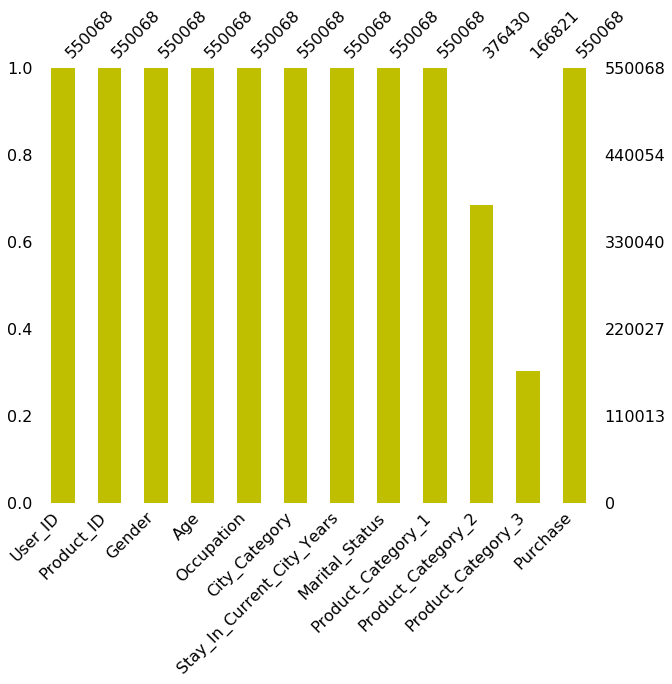

In [43]:
#Visualising the null values using missingo function
import missingno as msno
msno.bar(data,color="y",figsize=(10,8))

In [44]:
# fill nan with 0 i.e they didnt buy any category
data = data.fillna(0)
data_numeric = data[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]].groupby("User_ID").sum().reset_index().drop("User_ID", axis=1)
data_categoric = data.drop_duplicates("User_ID")[["User_ID", "Gender", "Age", "Occupation","City_Category", "Stay_In_Current_City_Years", "Marital_Status"]].reset_index().drop(["index"], axis=1)
data = pd.concat([data_categoric, data_numeric], axis=1)
data[["Product_Category_2", "Product_Category_3"]] = data[["Product_Category_2", "Product_Category_3"]].astype("int64")
print("\nNumber of customers on Black Friday: ", data.shape[0])


Number of customers on Black Friday:  5891


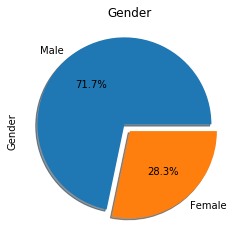

In [10]:
#Gender and Age
data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)

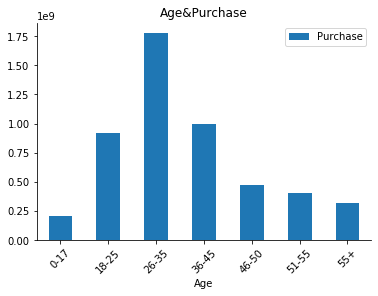

In [11]:
data.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Age&Purchase")
plt.xticks(rotation=45)
sns.despine()

1.looks like most of our shoppers happen to be single or unmarried

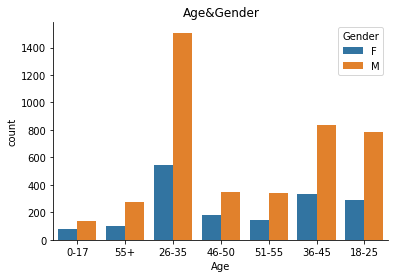

In [12]:
sns.countplot(data["Age"], hue=data["Gender"]).set_title("Age&Gender")
sns.despine()

Here, we can see that out off all Cities, the highest proportion of single shoppers seems to be in City A

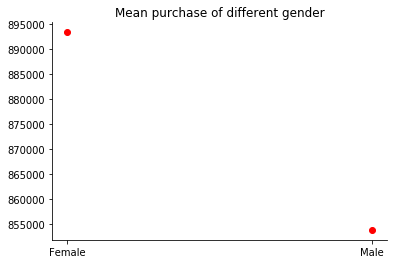

In [13]:
x = data.groupby(["Gender"]).mean()[["Purchase"]].index
y = data.groupby(["Gender"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")
sns.despine()

# Insights from age and gender plots
1. Main customers are male(over 70 percent), especially those of age 26-35, who account for almost one third of male cuntomers of all ages. 
2. The plot of mean purchase of different gender shows that individual female customer generally spend more(about 30k dollar more) that their male counterpart.
3. In spite of gender, people between age of 18 and 45 have made up almost four fifths sales. 
4. Young men showed greater purchasing power overall, but it's also possible that male customers are paying when shopping together with females.

In [14]:
# checking dependency of gender on purchase

x = data[['Gender', 'Purchase']].groupby('Gender').mean()
x = pd.DataFrame(x)
x

,Purchase
Gender,
F,893297.660264
M,853864.814201


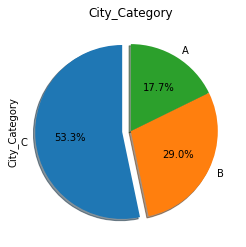

In [15]:
data["City_Category"].value_counts().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

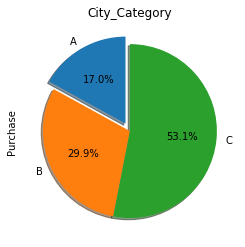

In [16]:
data.groupby("City_Category")["Purchase"].sum().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

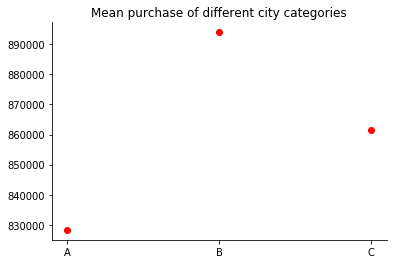

In [17]:
x = data.groupby(["City_Category"]).mean()[["Purchase"]].index
y = data.groupby(["City_Category"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.title("Mean purchase of different city categories")
sns.despine()

# Customers from C_category cities make up more than half of our black friday sales. 
1. Surprisingly, although there are not very many customers from B_type city, they relatively spend more than other customers in each purchase.
2. On the contrary, we didn't get very many customers from A_type city and they spent the least .

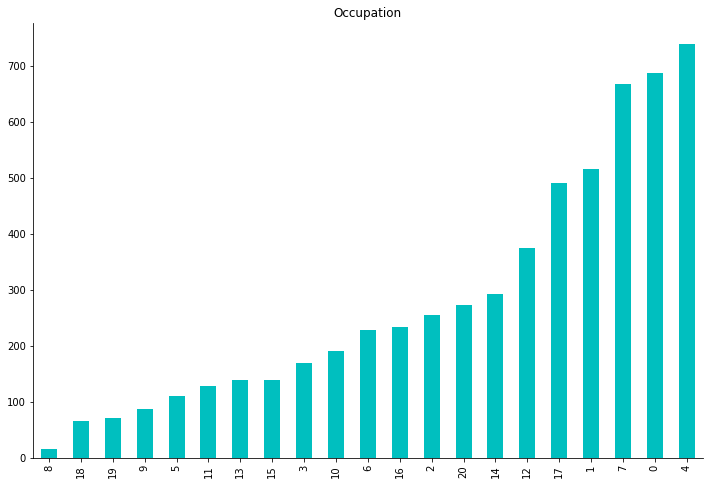

In [45]:
data["Occupation"].value_counts().sort_values().plot.bar(title="Occupation", color="c", figsize=(12, 8))
sns.despine()

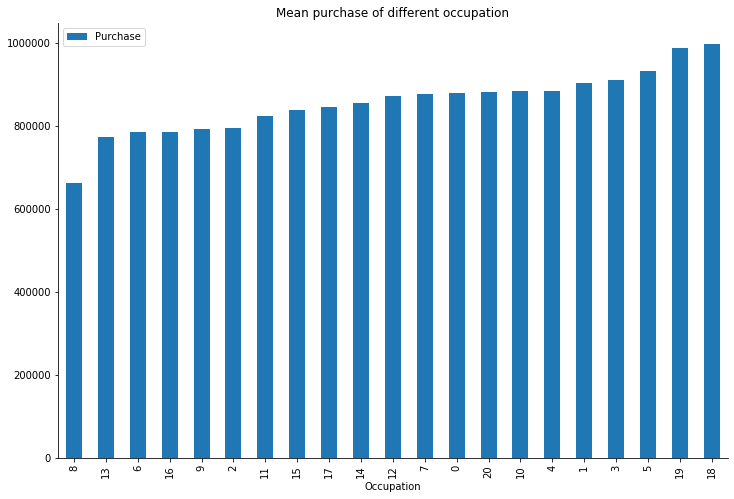

In [46]:
data.groupby(["Occupation"]).mean()[["Purchase"]].sort_values(by="Purchase").plot.bar(title="Mean purchase of different occupation", figsize=(12, 8))
sns.despine()

# From occupation figure only we see that our customers have a wide range of occupations. 
1. Overall, the bars show a steep cliff. Ocupation 4, 0, 7, 1, 17, 1 are the most common ones and they exceed other occupations by a great margin, which means people having this six occupations should definately be our main marketing target. The second figure above shows something very different. There is a cluster in how much they spent, most people spent around 600K to 800K .
2. People with occupation 18, 19 typically spent more than others on Black Friday, although none of them were in the common occupations for our customers. As a matter of fact, occupation 18 and 19 were next to the least common occupation for our customers. 
3. Make different marketing stratgies for our biggest target and biggest spender.

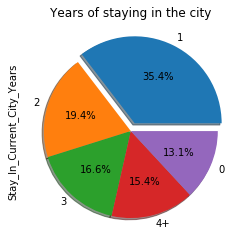

In [20]:

data["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city", explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)

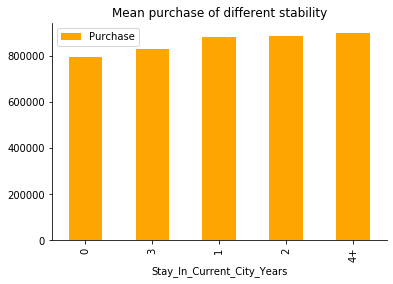

In [21]:
data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].sort_values(by="Purchase").plot.bar(title="Mean purchase of different stability", color="orange")
sns.despine()


1. New residents(one year or less) consist of around half of our black friday customers, which shows that they are more popular for new comers. People who have been living in current city for longer spend a bit more than new comers. 
2. Since they chose to stay with them, they do need to find out what kept them loyal so they can make better plans to keep more customers instead of losing them over time.

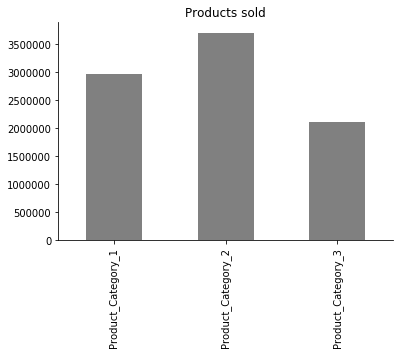

In [22]:
data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="grey")
sns.despine()

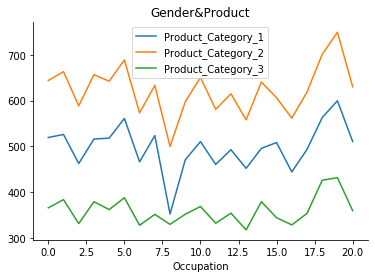

In [47]:
data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Gender&Product")
sns.despine()

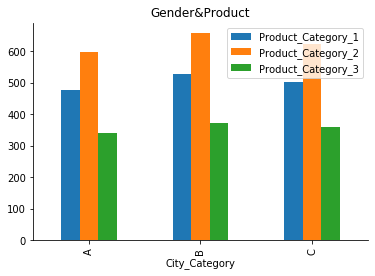

In [24]:
data.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Gender&Product")
sns.despine()
#Products under category 2 are our most popular items, and this is true for all kinds of customers coming from different backgrounds

Text(0.5, 0.98, 'Correlation between features')

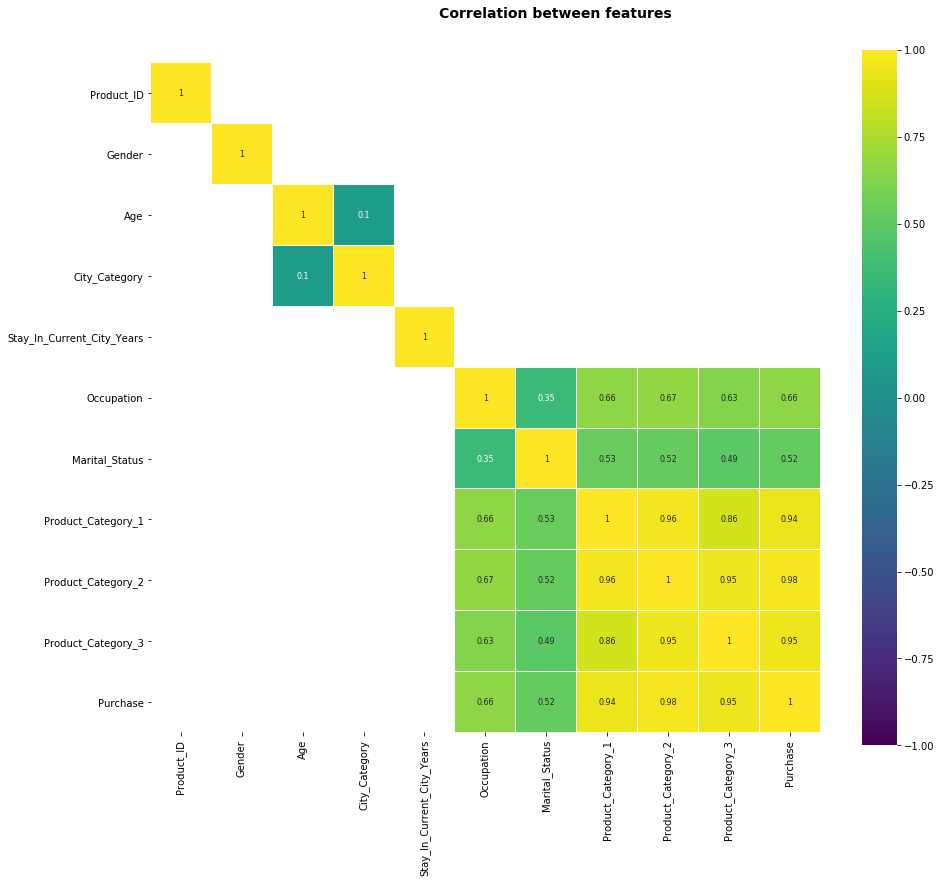

In [26]:
# label encoding: categorical to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = data.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    data.loc[:, i] = le.fit_transform(data.loc[:, i])
    
fig, ax = plt.subplots(figsize=(15, 12))
corr=data.corr()
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation between features', fontsize=14, fontweight='bold')
#sns.heatmap(data.drop("User_ID", axis=1).corr(), annot=True, cmap="viridis").set_title("Correlation between features")


1. From the heatmap above we can observe there are strong correlations between different types' products and purchase. There is also some correlation between age and marital status which is in line with common sense. But , there is no single feature that shows strong correlation with purchase directly,so we can understand this as that purchase depends on the ensemble of all features.
2. Product_Category_2 has a strong correlation with Purchase i.e. 0.98 Maybe the products in this category were cheap.

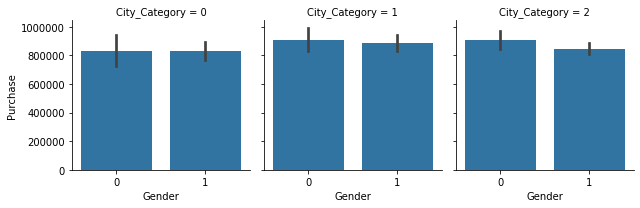

In [27]:
g = sns.FacetGrid(data,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");
#Clearly people from City_Category C are showing higher purchase capacity as compared to the other two cities on average.
#For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men. 
#It is a useful insight, and it be useful to oserve which age group of females does higher purchasing.

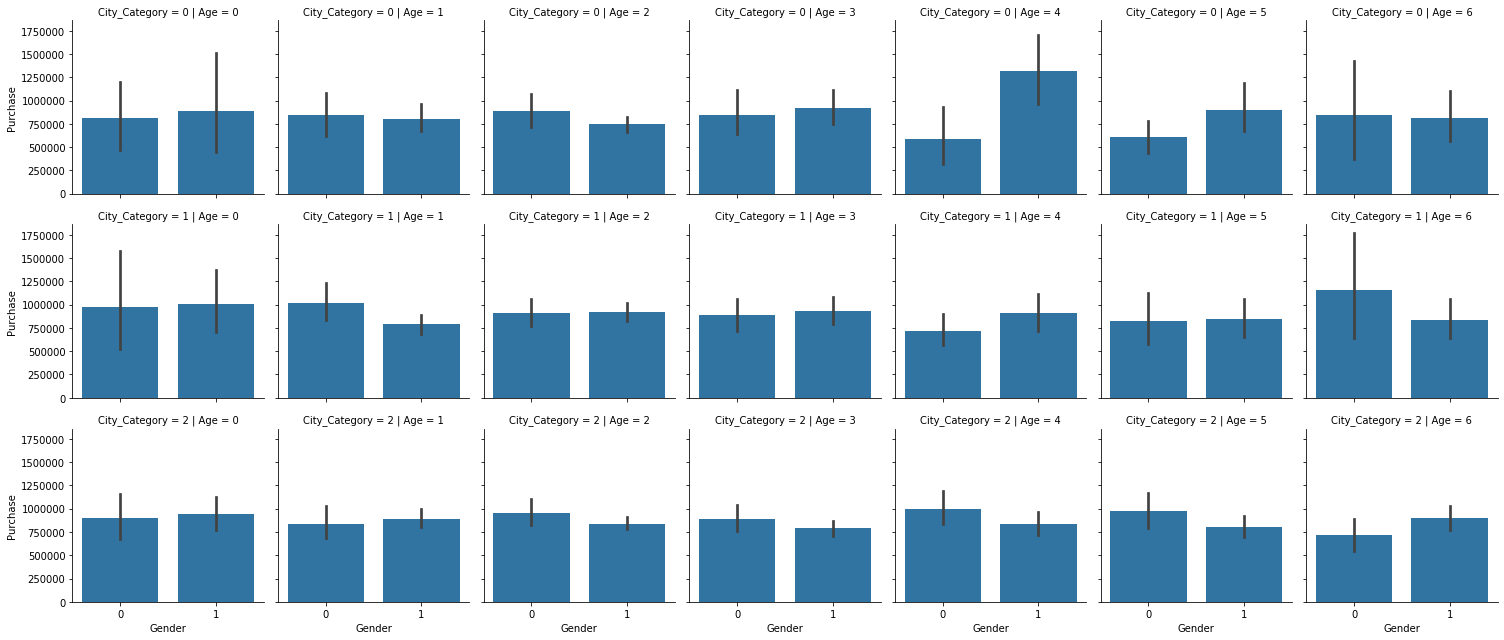

In [28]:
g = sns.FacetGrid(data,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");
#There are two age groups that can be identified with higher purchase, 26-35 and 18-25. 
#Therefore, apart from the male population of all the three city categories, females of City Category A in the above two identifies age groups can be identified as potential buyers for next time around.

In [ ]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data['Age'] = data['Age'].apply(map_age)

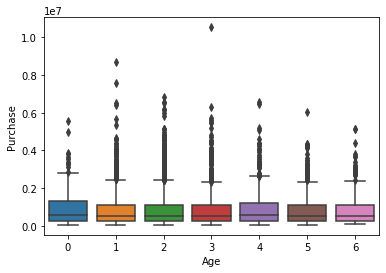

In [29]:
sns.boxplot('Age','Purchase', data = data)
plt.show()

1. We can say that no matter what age group you belong to, they full use of your purchasing power on  Black Friday as seen from similar mean purchase value